In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [191]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과


# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

In [6]:
## 함수 init
# 2006년 이후는 2005년으로 치환하여 갯수 카운트

def count_store(df):
    # 2006~2024년 구간의 인허가 연도별 카운트
    permit_count = df[df['인허가년도'].between(2005, 2024)].groupby('인허가년도').size()

    # # 누적 카운트 (각 년도별로 그 이전 년도까지의 합을 포함)
    # cumulative_permit_count = permit_count.cumsum()

    # 폐업년도 처리: 2005년 이후로 폐업한 사업장만 해당하며, 폐업년도가 있는 데이터만 필터링
    closure_count = df[df['폐업연도'].notna() & df['폐업연도'].between(2005, 2024)]

    # 폐업연도에 해당하는 사업장 개수를 각 연도별로 빼기
    closure_count = closure_count.groupby('폐업연도').size()

    # # 2006년을 0으로 추가
    # closure_count = pd.concat([pd.Series({2005: 0}), closure_count])

    # 정렬 (연도 순서대로)
    closure_count = closure_count.sort_index()
    
    # 누적 카운트, 년도별 카운트, 폐점 카운트, 최종 카운트(누적카운트-폐점카운트)
    return permit_count, closure_count

In [7]:
import os
os.chdir("/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra")

dataset_list = [x for x in os.listdir() if 'dataset_life_infra' in x]

In [8]:
dataset_list = [x for x in os.listdir() if 'dataset_life_infra' in x]

In [9]:
data = [x for x in dataset_list if '일반음식점_인' in x]
print(data)

['dataset_life_infra_일산_일반음식점_인허가일자포함.csv', 'dataset_life_infra_분당_일반음식점_인허가일자포함.csv']


In [196]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

# 음식점 점포수

## 분당처리
- 2006년 이전 데이터 -> 전부 2006년도로 치환 후 누적합산 처리

In [197]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2005로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

# 필요한 열만 선택
filtered_data_bundang = filtered_data_bundang[["사업장명", "소재지도로명주소", "소재지지번주소", "위도", "경도", "영업상태명", "인허가일자", "폐업일자", "업태구분명정보", "인허가년도", "폐업연도"]]


## 일산 처리

In [198]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

# 필요한 열만 선택
filtered_data_ilsan = filtered_data_ilsan[["사업장명", "소재지도로명주소", "소재지지번주소", "위도", "경도", "영업상태명", "인허가일자", "폐업일자", "업태구분명정보", "인허가년도", "폐업연도"]]


In [199]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

# # 증감률 시작일자 0으로 변경
change_rate_bundang = permit_bundang_count - closure_bundang_count
# change_rate_bundang.iloc[0] = 0 

# 데이터 프레임화
count_df_bundang = pd.DataFrame([permit_bundang_count ,closure_bundang_count, change_rate_bundang, change_rate_bundang.cumsum()]).T.reset_index()
count_df_bundang.columns = ['년도', '인허가갯수','폐업갯수', '증감률','년도별갯수']

In [200]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

# # 증감률 시작일자 0으로 변경
change_rate_ilsan = permit_ilsan_count - closure_ilsan_count
# change_rate_ilsan.iloc[0] = 0 

count_df_ilsan = pd.DataFrame([permit_ilsan_count ,closure_ilsan_count, change_rate_ilsan,change_rate_ilsan.cumsum()]).T.reset_index()
count_df_ilsan.columns = ['년도','인허가갯수','폐업갯수', '증감률','년도별갯수']
    

In [201]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,3890,449,3441,3441
1,2006,387,487,-100,3341
2,2007,377,384,-7,3334
3,2008,335,449,-114,3220
4,2009,354,283,71,3291
5,2010,335,314,21,3312
6,2011,266,310,-44,3268
7,2012,319,295,24,3292
8,2013,240,206,34,3326
9,2014,307,252,55,3381


In [202]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,5731,533,5198,5198
1,2006,760,713,47,5245
2,2007,853,642,211,5456
3,2008,582,575,7,5463
4,2009,676,850,-174,5289
5,2010,701,564,137,5426
6,2011,658,636,22,5448
7,2012,559,470,89,5537
8,2013,635,531,104,5641
9,2014,633,482,151,5792


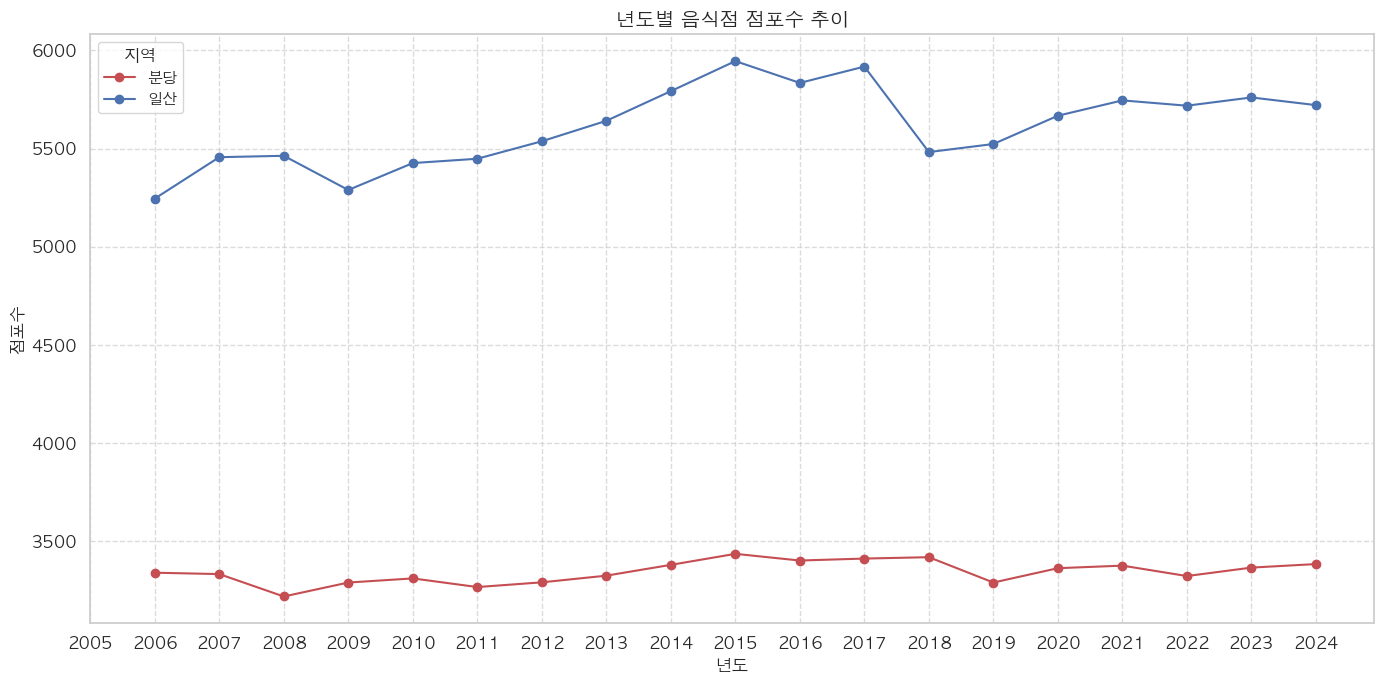

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과

sns.set(style='whitegrid')

# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14, 7))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 음식점 점포수 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)


plt.xticks(count_df_bundang['년도'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# 그래프 출력
plt.show()

# 학교

In [204]:
data = [x for x in dataset_list if '학교' in x]
print(data)

['dataset_life_infra_일산_학교.csv', 'dataset_life_infra_분당_학교.csv']


In [205]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

In [206]:
data_bundang['설립년도'] = data_bundang['설립일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang.loc[:, '설립년도'] = data_bundang['설립년도'].apply(lambda x: 2005 if int(x) < 2006 else x)
data_bundang_count = data_bundang.groupby('설립년도').size()

data_ilsan['설립년도'] = data_ilsan['설립일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan.loc[:, '설립년도'] = data_ilsan['설립년도'].apply(lambda x: 2005 if int(x) < 2006 else x)
data_ilsan_count = data_ilsan.groupby('설립년도').size()

In [207]:
school_index = range(2005, 2025)

count_df_school = pd.DataFrame(index=school_index)
count_df_school['분당_설립년도_카운트'] = data_bundang_count
count_df_school['일산_설립년도_카운트'] = data_ilsan_count

count_df_school = count_df_school.reset_index()
count_df_school.columns = ['년도', '분당_설립년도_카운트' ,'일산_설립년도_카운트']

# NaN 값을 0으로 채우기
count_df_school = count_df_school.fillna(0).astype(int)
display(count_df_school)

,년도,분당_설립년도_카운트,일산_설립년도_카운트
0,2005,64,72
1,2006,0,5
2,2007,0,1
3,2008,1,6
4,2009,0,0
5,2010,0,2
6,2011,0,5
7,2012,0,2
8,2013,0,0
9,2014,0,0


In [208]:
count_df_school_cumulative = count_df_school.copy()
count_df_school_cumulative['분당_설립년도_카운트'] = count_df_school_cumulative['분당_설립년도_카운트'].cumsum()
count_df_school_cumulative['일산_설립년도_카운트'] = count_df_school_cumulative['일산_설립년도_카운트'].cumsum()
# count_df_school_cumulative = count_df_school_cumulative.reset_index()
count_df_school_cumulative.columns = ['년도', '분당_설립년도_카운트' ,'일산_설립년도_카운트']
display(count_df_school_cumulative)

,년도,분당_설립년도_카운트,일산_설립년도_카운트
0,2005,64,72
1,2006,64,77
2,2007,64,78
3,2008,65,84
4,2009,65,84
5,2010,65,86
6,2011,65,91
7,2012,65,93
8,2013,65,93
9,2014,65,93


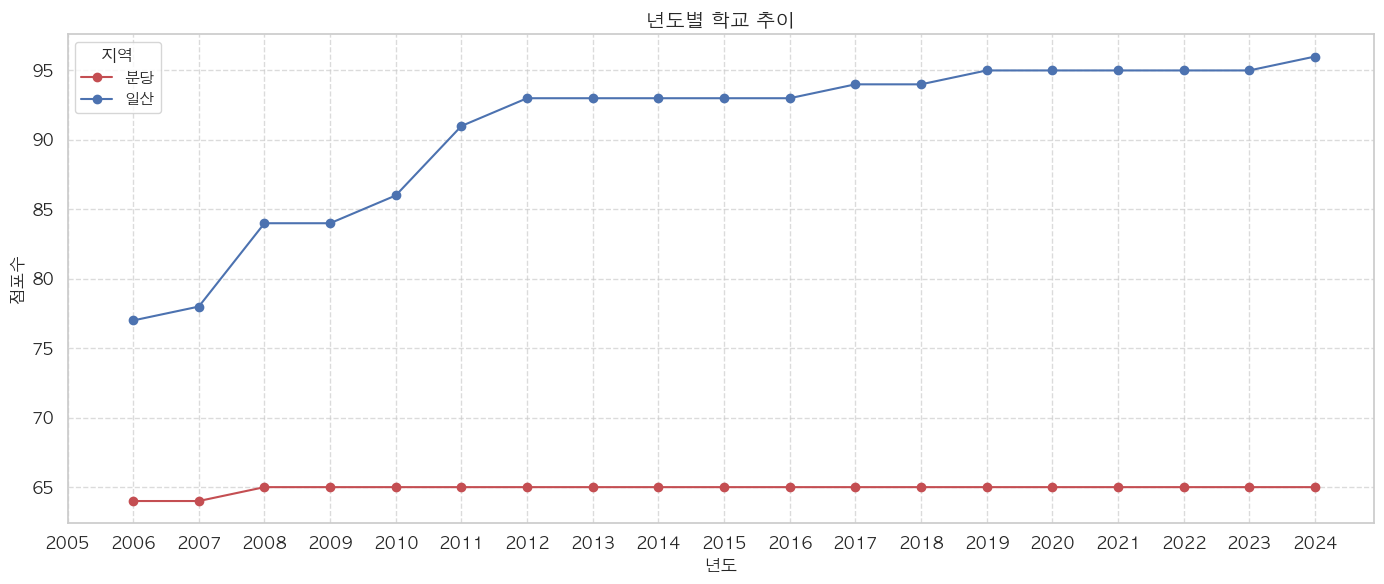

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과

sns.set(style='whitegrid')

# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(count_df_school_cumulative.loc[1:]['년도'], count_df_school_cumulative.loc[1:]['분당_설립년도_카운트'], marker='o', color='r', linestyle='-')
plt.plot(count_df_school_cumulative.loc[1:]['년도'], count_df_school_cumulative.loc[1:]['일산_설립년도_카운트'], marker='o', color='b', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 학교 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

plt.xticks(count_df_bundang['년도'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# 그래프 출력
plt.show()

# 병원 및 의원

In [210]:
dataset_list

['dataset_life_infra_분당_공원.csv',
 'dataset_life_infra_분당_대규모점포_인허가일자포함.csv',
 'dataset_life_infra_일산_일반음식점.csv',
 'dataset_life_infra_일산_학교.csv',
 'dataset_life_infra_일산_의원.csv',
 'dataset_life_infra_분당_의원.csv',
 'dataset_life_infra_분당_학교.csv',
 'dataset_life_infra_일산_병원.csv',
 'dataset_life_infra_분당_시장및마트.csv',
 'dataset_life_infra_일산_대규모점포_인허가일자포함.csv',
 'dataset_life_infra_일산_대규모점포.csv',
 'dataset_life_infra_일산_시장및마트.csv',
 'dataset_life_infra_일산_공원.csv',
 'dataset_life_infra_일산_일반음식점_인허가일자포함.csv',
 'dataset_life_infra_분당_일반음식점_인허가일자포함.csv',
 'dataset_life_infra_분당_병원.csv']

In [10]:
import pandas as pd

data_bundang = pd.read_csv('/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra/dataset_life_infra_분당_병원.csv')
data_ilsan = pd.read_csv('/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra/dataset_life_infra_일산_병원.csv')

## 분당

In [11]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [12]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

# 증감률 계산
change_rate_bundang = permit_bundang_count - closure_bundang_count
# change_rate_bundang.iloc[0] = 0 


In [13]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_bundang = pd.DataFrame(index=index)
count_df_bundang['인허가갯수'] = permit_bundang_count
count_df_bundang['폐업갯수'] = closure_bundang_count
count_df_bundang = count_df_bundang.fillna(0).astype(int)

count_df_bundang['증감률'] = count_df_bundang['인허가갯수'] - count_df_bundang['폐업갯수']
count_df_bundang['년도별갯수'] = count_df_bundang['증감률'].cumsum()

count_df_bundang = count_df_bundang.reset_index()

count_df_bundang.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']


In [14]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,20,0,20,20
1,2006,5,3,2,22
2,2007,1,0,1,23
3,2008,0,2,-2,21
4,2009,1,0,1,22
5,2010,2,1,1,23
6,2011,2,2,0,23
7,2012,3,1,2,25
8,2013,1,1,0,25
9,2014,0,2,-2,23


## 일산

In [15]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [16]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

In [17]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_ilsan = pd.DataFrame(index=index)
count_df_ilsan['인허가갯수'] = permit_ilsan_count
count_df_ilsan['폐업갯수'] = closure_ilsan_count
count_df_ilsan = count_df_ilsan.fillna(0).astype(int)

count_df_ilsan['증감률'] = count_df_ilsan['인허가갯수'] - count_df_ilsan['폐업갯수']
count_df_ilsan['년도별갯수'] = count_df_ilsan['증감률'].cumsum()

count_df_ilsan = count_df_ilsan.reset_index()

count_df_ilsan.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [18]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,16,0,16,16
1,2006,4,0,4,20
2,2007,8,0,8,28
3,2008,6,3,3,31
4,2009,8,2,6,37
5,2010,2,2,0,37
6,2011,1,2,-1,36
7,2012,5,1,4,40
8,2013,4,2,2,42
9,2014,4,2,2,44


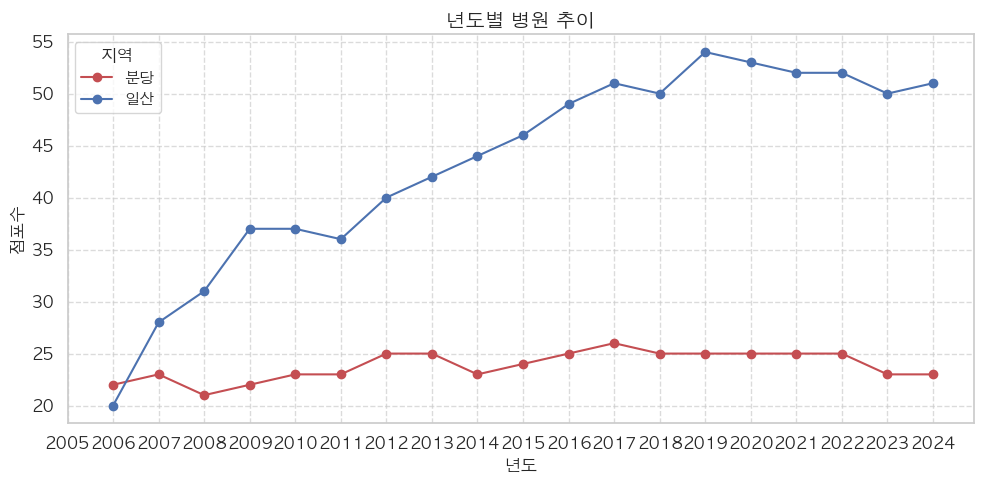

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과

sns.set(style='whitegrid')

# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 병원 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

plt.xticks(count_df_bundang['년도'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# 그래프 출력
plt.show()

## 의원

In [221]:
data_bundang = pd.read_csv('/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra/dataset_life_infra_분당_의원.csv')
data_ilsan = pd.read_csv('/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra/dataset_life_infra_일산_의원.csv')

In [222]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [223]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

# # 증감률 시작일자 0으로 변경
# change_rate_bundang = permit_bundang_count - closure_bundang_count
# change_rate_bundang.iloc[0] = 0 

In [224]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_bundang = pd.DataFrame(index=index)
count_df_bundang['인허가갯수'] = permit_bundang_count
count_df_bundang['폐업갯수'] = closure_bundang_count
count_df_bundang = count_df_bundang.fillna(0).astype(int)

count_df_bundang['증감률'] = count_df_bundang['인허가갯수'] - count_df_bundang['폐업갯수']
count_df_bundang['년도별갯수'] = count_df_bundang['증감률'].cumsum()

count_df_bundang = count_df_bundang.reset_index()

count_df_bundang.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [225]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,623,55,568,568
1,2006,87,51,36,604
2,2007,73,51,22,626
3,2008,58,43,15,641
4,2009,40,34,6,647
5,2010,47,37,10,657
6,2011,38,26,12,669
7,2012,36,21,15,684
8,2013,41,36,5,689
9,2014,38,30,8,697


# 일산

In [226]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '폐업연도'] = filtered_data_ilsan['폐업연도'].apply(lambda x: 2005 if x < 2006 else x)

In [227]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

# # 증감률 시작일자 0으로 변경
# change_rate_ilsan = permit_ilsan_count - closure_ilsan_count
# change_rate_ilsan.iloc[0] = 0 

In [228]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_ilsan = pd.DataFrame(index=index)
count_df_ilsan['인허가갯수'] = permit_ilsan_count
count_df_ilsan['폐업갯수'] = closure_ilsan_count
count_df_ilsan = count_df_ilsan.fillna(0).astype(int)

count_df_ilsan['증감률'] = count_df_ilsan['인허가갯수'] - count_df_ilsan['폐업갯수']
count_df_ilsan['년도별갯수'] = count_df_ilsan['증감률'].cumsum()

count_df_ilsan = count_df_ilsan.reset_index()

count_df_ilsan.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [229]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,441,0,441,441
1,2006,79,0,79,520
2,2007,61,2,59,579
3,2008,52,33,19,598
4,2009,48,48,0,598
5,2010,36,34,2,600
6,2011,42,31,11,611
7,2012,46,32,14,625
8,2013,36,39,-3,622
9,2014,45,24,21,643


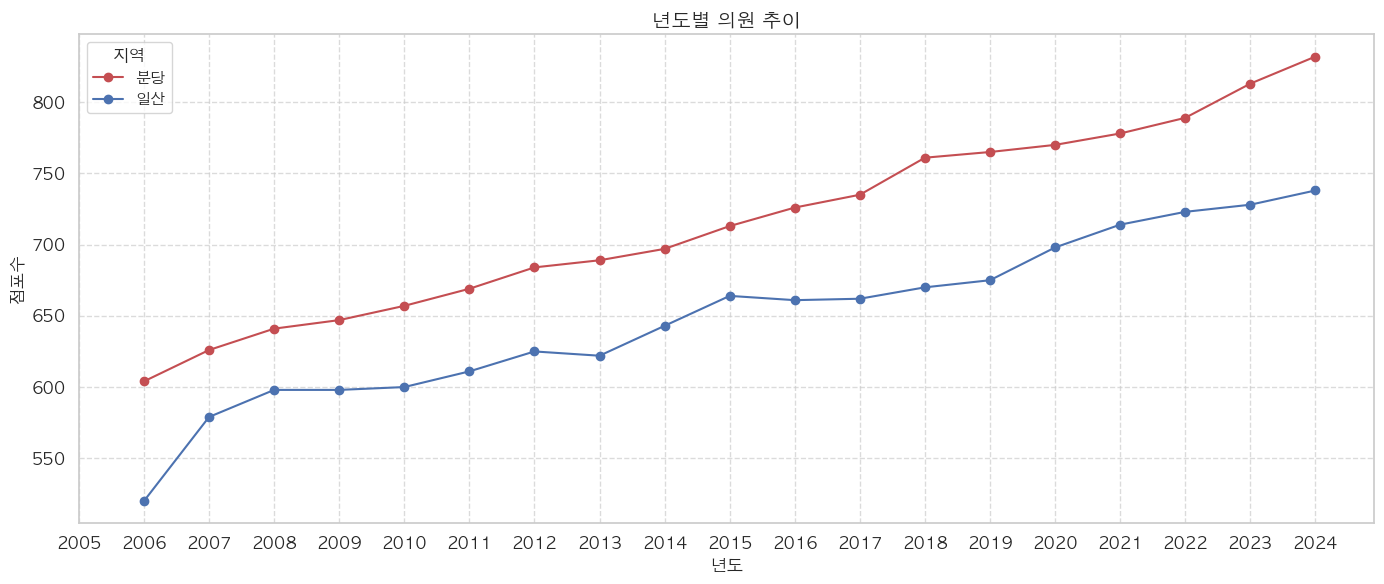

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과

sns.set(style='whitegrid')

# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 의원 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

plt.xticks(count_df_bundang['년도'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# 그래프 출력
plt.show()

# 대규모점포

In [231]:
data_bundang = pd.read_csv('/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra/dataset_life_infra_분당_대규모점포_인허가일자포함.csv')
data_ilsan = pd.read_csv('/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra/dataset_life_infra_일산_대규모점포_인허가일자포함.csv')

In [232]:
data_bundang = data_bundang[data_bundang['영업상태명'].isin(['영업개시전', '정상영업'])]
print(data_bundang.shape)
data_bundang.head()

(46, 11)


,Unnamed: 0.1,Unnamed: 0,사업장명,영업상태명,인허가일자,폐업일자,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,업태구분명정보
0,0,0,GS THE FRESH 분당이매역점,영업개시전,2023-11-08,NaN,"경기도 성남시 분당구 이매로 45, 이수프라자 (이매동)",경기도 성남시 분당구 이매동 115-2 이수프라자,37.394981,127.125889,그 밖의 대규모점포
1,2,2,돌고래시장,정상영업,1996-12-20,NaN,경기도 성남시 분당구 내정로174번길 42 (수내동),경기도 성남시 분당구 수내동 53호,37.371197,127.122076,시장
2,3,3,미래타운제2종합시장,정상영업,1994-12-02,NaN,경기도 성남시 분당구 불정로376번길 31 (서현동),경기도 성남시 분당구 서현동 311호,37.372287,127.138910,그 밖의 대규모점포
3,4,4,"테마폴리스 지상1,2층",정상영업,2005-05-27,NaN,"경기도 성남시 분당구 성남대로925번길 16 (야탑동,테마폴리스 지상1,2층)","경기도 성남시 분당구 야탑동 341번지 테마폴리스 지상1,2층",37.413026,127.127214,그 밖의 대규모점포
4,5,5,테마폴리스 지하2층점,정상영업,2005-07-25,NaN,경기도 성남시 분당구 성남대로925번길 16 (야탑동),경기도 성남시 분당구 야탑동 341호,37.413026,127.127214,그 밖의 대규모점포


In [233]:
data_ilsan = data_ilsan[data_ilsan['영업상태명'].isin(['영업개시전', '정상영업'])]
print(data_ilsan.shape)
data_ilsan.head()

(41, 10)


,Unnamed: 0,사업장명,영업상태명,인허가일자,폐업일자,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,업태구분명정보
0,0,라 몬테 이탈리아노,영업개시전,2019-01-22,NaN,"경기도 고양시 일산동구 연리지로 51, 라몬테이탈리아노 (장항동)",경기도 고양시 일산동구 장항동 1800번지 라몬테이탈리아노,37.659901,126.754939,그 밖의 대규모점포
1,1,GIFC MALL,영업개시전,2019-01-23,NaN,경기도 고양시 일산서구 킨텍스로 240 (대화동),경기도 고양시 일산서구 대화동 2603번지,37.666098,126.750520,그 밖의 대규모점포
2,2,고양 일산 호수공원 가로수길,영업개시전,2017-08-25,NaN,경기도 고양시 일산서구 주엽로 80 (대화동),경기도 고양시 일산서구 대화동 1050번지 185호,37.665939,126.756403,그 밖의 대규모점포
3,3,일산 벨라씨타(Bella Citta),영업개시전,2016-08-26,NaN,"경기도 고양시 일산동구 강송로 33 (백석동, 일산요진와이시티)",경기도 고양시 일산동구 백석동 1237번지,37.642359,126.792682,쇼핑센터
4,4,레이킨스몰,정상영업,2010-08-26,NaN,경기도 고양시 일산서구 호수로 817 (대화동),경기도 고양시 일산서구 대화동 2602번지,37.667964,126.751387,그 밖의 대규모점포


In [234]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [235]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

In [236]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_bundang = pd.DataFrame(index=index)
count_df_bundang['인허가갯수'] = permit_bundang_count
count_df_bundang['폐업갯수'] = closure_bundang_count
count_df_bundang = count_df_bundang.fillna(0).astype(int)

count_df_bundang['증감률'] = count_df_bundang['인허가갯수'] - count_df_bundang['폐업갯수']
count_df_bundang['년도별갯수'] = count_df_bundang['증감률'].cumsum()

count_df_bundang = count_df_bundang.reset_index()

count_df_bundang.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [237]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,31,0,31,31
1,2006,0,0,0,31
2,2007,1,0,1,32
3,2008,0,0,0,32
4,2009,1,0,1,33
5,2010,2,0,2,35
6,2011,3,0,3,38
7,2012,2,0,2,40
8,2013,4,0,4,44
9,2014,1,0,1,45


In [238]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [239]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

In [240]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_ilsan = pd.DataFrame(index=index)
count_df_ilsan['인허가갯수'] = permit_ilsan_count
count_df_ilsan['폐업갯수'] = closure_ilsan_count
count_df_ilsan = count_df_ilsan.fillna(0).astype(int)

count_df_ilsan['증감률'] = count_df_ilsan['인허가갯수'] - count_df_ilsan['폐업갯수']
count_df_ilsan['년도별갯수'] = count_df_ilsan['증감률'].cumsum()

count_df_ilsan = count_df_ilsan.reset_index()

count_df_ilsan.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [241]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,16,0,16,16
1,2006,0,0,0,16
2,2007,3,0,3,19
3,2008,1,0,1,20
4,2009,0,0,0,20
5,2010,3,0,3,23
6,2011,1,0,1,24
7,2012,7,0,7,31
8,2013,4,0,4,35
9,2014,0,0,0,35


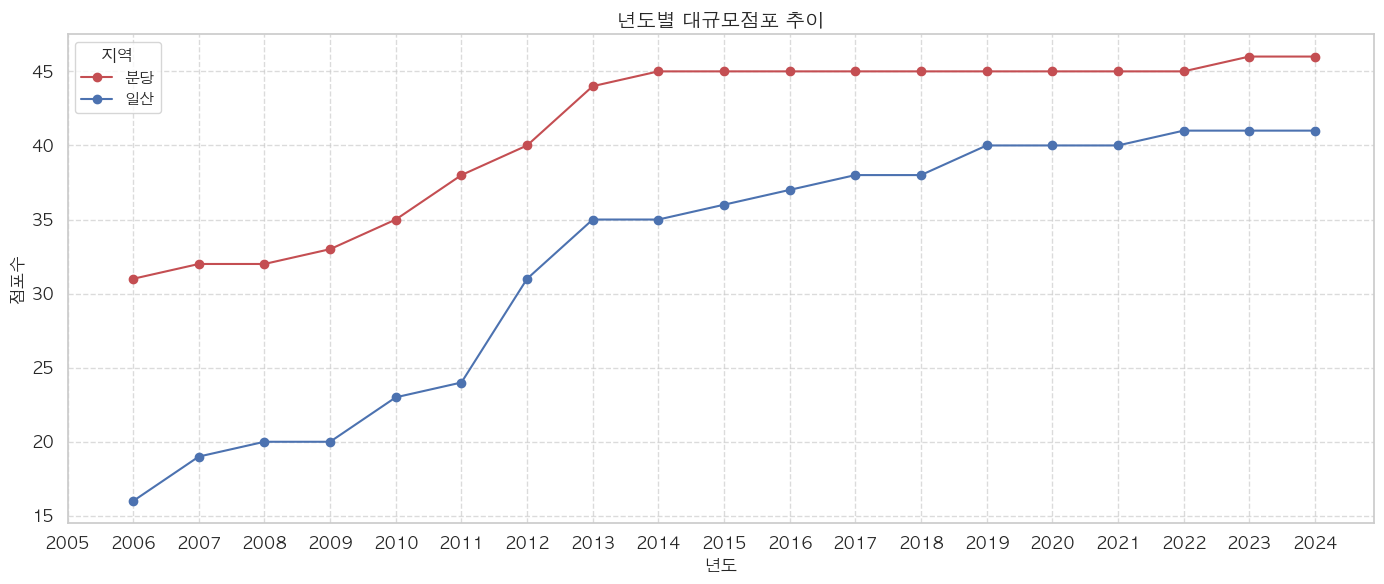

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과

sns.set(style='whitegrid')

# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 대규모점포 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)


plt.xticks(count_df_bundang['년도'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# 그래프 출력
plt.show()